<a href="https://colab.research.google.com/github/Berengarius13/Notebook/blob/main/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BREST CANCER DATASET
* We will apply linear classification model on this standard dataset
* Tensorfow 2 will be used

In [39]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [40]:
# Load the dataset using
from sklearn.datasets import load_breast_cancer

In [41]:
# Load the data 
data = load_breast_cancer()

In [42]:
# Analyse the data using this step
# help(data)
print(type(data))
print(dir(data))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


##### Learnings
* Utils.Bunch is just an extension of dictionary

In [43]:
# In buch you can basically treat keys as attributes, 
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [44]:
# Data attribute is basically input data as ndarray
X = data.data
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(569, 30)


In [45]:
# We get the target as 0 and 1s
y = data.target
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 

In [46]:
# Meaning of target
# Benign are not cancerous but malignant are cancerous
target_names = data.target_names
target_names

array(['malignant', 'benign'], dtype='<U9')

In [47]:
# Features names
feature_name = data.feature_names
feature_name

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
# Split data in test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
N, D = X_train.shape
print(N)
print(D)

381
30


In [53]:
# Data needs to be scaled
# Scaling test and train data individually
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [57]:
# Steps to build model in tensorflow

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape= (D,), activation = "sigmoid"))

model.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

# Train the model
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 100)

# Evaluate model
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 0.7034 - accuracy: 0.5669 - val_loss: 0.6999 - val_accuracy: 0.6064
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.6220 - val_loss: 0.6342 - val_accuracy: 0.6436
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.6745 - val_loss: 0.5782 - val_accuracy: 0.7340
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7192 - val_loss: 0.5307 - val_accuracy: 0.7660
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7507 - val_loss: 0.4920 - val_accuracy: 0.7819
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7664 - val_loss: 0.4581 - val_accuracy: 0.8245
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8084 - val_loss: 0.4297 - val_accuracy: 0.8298
Epoch 8/100


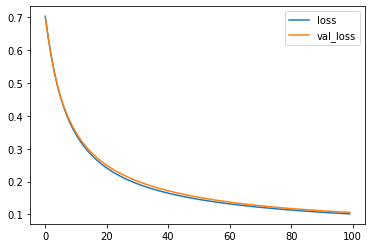

In [58]:
# Plot what is returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label = "loss")
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.legend()